In [65]:
%reset -f
%load_ext autoreload
%autoreload 2

import sys
import os

sys.path.append(os.path.join(os.path.pardir, 'code'))
figdir = os.path.join(os.path.pardir, 'fig')
datadir = os.path.join(os.path.pardir, 'data')

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
import pynumdiff
import pickle
import time

import utils
import figurefirst as fifi
import figure_functions as ff

from mpc_fly import MpcFlyWind

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set time

In [66]:
fs = 100.0
dt = 1/fs
T = 0.5
n_point = int((T * fs) + 1)
tsim = dt * (np.linspace(1.0, n_point, n_point) - 1)
tsim

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

In [67]:
v_para = 0.5 * np.ones_like(tsim)
v_perp = 0.0 * np.ones_like(tsim)
phi = np.pi * np.sin(2*np.pi*2*tsim)
w = 0.4 * np.ones_like(tsim)
zeta = 0.1 * np.ones_like(tsim)

In [68]:
# Reconstruct trajectory with MPC
n_horizon = 10
r_weight = 1e-6
fly_mpc = MpcFlyWind(v_para, v_perp, phi, w, zeta, x0=None, dt=dt, n_horizon=n_horizon, r_weight=r_weight, run=True)

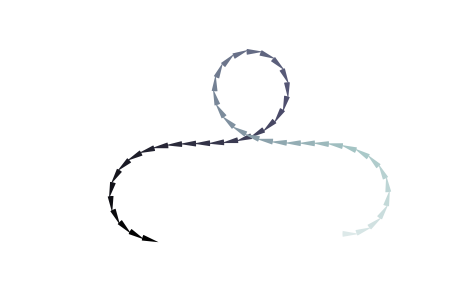

In [69]:
fly_mpc.plot_trajectory(arrow_size=0.006, nskip=0)

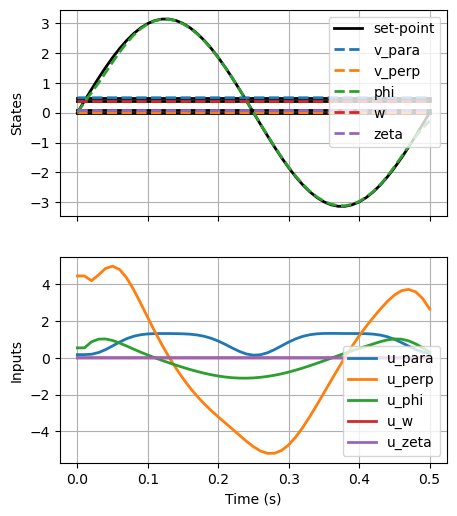

In [70]:
fly_mpc.plot_setpoint_tracking(size=5, lw=2)

# Sweep wind speeds and angles

In [71]:
w_list = [0.1, 0.4, 1.0, 5.0, 10.0]
# w_list = [0.4]

In [72]:
res = np.pi / 16
zeta_list = np.arange(0, 2*np.pi - 0.9*res, res)
# zeta_list = [0.0]

In [73]:
res = np.pi / 8
phi_list = np.arange(0, 2*np.pi - 0.9*res, res)
# phi_list

In [74]:
# res = np.pi / 8
# phidot_list = np.arange(-2*np.pi, 2*np.pi + 0.5*res, step=res)
phidot_list = [np.pi/4, np.pi, 2*np.pi]

In [75]:
n_traj = len(w_list) * len(zeta_list) * len(phi_list) * len(phidot_list)
n_traj

7680

In [76]:
DATA = []
p = 1
for w0 in w_list:
    for zeta0 in zeta_list:
        for phi0 in phi_list:
            for phidot0 in phidot_list:
                if not (p%10):
                    print(p, end=', ')    
                    
                # Wind & heading
                w = w0 * np.ones_like(tsim)
                zeta = zeta0 * np.ones_like(tsim)

                # Heading
                phi = phi0 + (phidot0 * np.sin(2*np.pi*2*tsim))

                # Run MPC
                fly_mpc = MpcFlyWind(v_para, v_perp, phi, w, zeta, x0=None, dt=dt, n_horizon=n_horizon, r_weight=r_weight, run=True)
                # fly_mpc.plot_traj(cmap=None, size=5, dpi=100, arrow_size=0.005, nskip=0)
                # mpc.plot_setpoint_tracking(size=4, lw=2)
                
                sim_data = fly_mpc.sim_data_df.copy()
                
                sim_data['phi'] = utils.wrapToPi(sim_data['phi'])
                sim_data['psi'] = utils.wrapToPi(sim_data['psi'])
                sim_data['gamma'] = utils.wrapToPi(sim_data['gamma'])
                sim_data['alpha'] = utils.wrapToPi(sim_data['alpha'])
                
                DATA.append(fly_mpc.sim_data_df)

                p+=1
                    
print('Done')        

10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850

In [77]:
DATA_ALL = pd.concat(DATA)
DATA_ALL.shape

(391680, 72)

In [78]:
np.round(DATA_ALL, 5)

,time,v_para,v_perp,phi,phidot,w,zeta,I,m,C_para,C_perp,C_phi,d,km1,km2,km3,km4,ks1,ks2,ks3,ks4,ks5,ks6,ks7,g,psi,of,a_para,a_perp,a,gamma,v_para_dot,v_perp_dot,v_para_dot_uncal,v_perp_dot_uncal,phiddot,q,alpha,dir_of_travel,xvel,yvel,xpos,ypos,u_para,u_perp,u_phi,wdot,zetadot,u_g,u_psi,phi_uncal,gamma_uncal,psi_uncal,alpha_uncal,phi_y,phi_x,psi_y,psi_x,gamma_y,gamma_x,alpha_y,alpha_x,zeta_x,zeta_y,phi_uncal_y,phi_uncal_x,psi_uncal_y,psi_uncal_x,gamma_uncal_y,gamma_uncal_x,alpha_uncal_y,alpha_uncal_x
0,0.00,0.50000,0.00000,0.00000,9.92127,0.10000,0.00000,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50000,0.00000,1.66667,0.40000,0.00000,0.40000,0.00000,0.00633,-0.53407,0.00633,-0.53407,-261.49178,0.53411,-1.55895,0.00000,0.50000,0.00000,0.00000,0.00000,0.58982,1.10664,135.47020,0.00004,0.00001,1.25401,1.08111,0.00000,0.00000,0.00000,-1.55895,0.00000,1.00000,0.00000,1.0,0.00000,1.00000,-0.99993,0.01184,1.00000,0.00000,0.00000,1.00000,0.00000,1.0,0.00000,1.00000,-0.99993,0.01184
1,0.01,0.49998,-0.00003,0.08816,7.88796,0.10000,0.00000,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.49998,-0.00007,1.66661,0.40037,0.00877,0.40047,0.02190,0.00387,0.43112,0.00387,0.43112,-154.50849,0.43114,1.56182,0.08809,0.49804,0.04399,0.00499,0.00022,0.58982,1.10664,135.47020,0.00004,0.00001,1.25401,1.08111,0.08816,0.02190,-0.00007,1.56182,0.08804,0.99612,-0.00007,1.0,0.02190,0.99976,0.99996,0.00898,1.00000,0.00000,0.08804,0.99612,-0.00007,1.0,0.02190,0.99976,0.99996,0.00898
2,0.02,0.50000,0.00000,0.16717,7.91159,0.10000,-0.00000,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50000,0.00001,1.66667,0.40139,0.01664,0.40174,0.04144,-0.00187,-0.02451,-0.00187,-0.02451,1.79575,0.02458,4.63620,0.16717,0.49303,0.08320,0.00995,0.00086,0.58981,1.00730,217.39497,-0.00004,-0.00001,1.16727,1.04108,0.16717,0.04144,0.00001,-1.64698,0.16639,0.98606,0.00001,1.0,0.04143,0.99914,-0.99710,-0.07611,1.00000,-0.00000,0.16639,0.98606,0.00001,1.0,0.04143,0.99914,-0.99710,-0.07611
3,0.03,0.50000,0.00000,0.24934,8.47477,0.10000,0.00000,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50000,0.00000,1.66667,0.40309,0.02468,0.40385,0.06115,-0.00759,-0.15085,-0.00759,-0.15085,42.79512,0.15104,4.66211,0.24935,0.48454,0.12339,0.01483,0.00189,0.59088,1.05792,254.12318,-0.00000,0.00000,1.21175,1.06143,0.24934,0.06115,0.00000,-1.62108,0.24677,0.96907,0.00000,1.0,0.06111,0.99813,-0.99874,-0.05026,1.00000,0.00000,0.24677,0.96907,0.00000,1.0,0.06111,0.99813,-0.99874,-0.05026
4,0.04,0.50000,0.00000,0.33609,8.84242,0.10000,0.00000,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50000,0.00000,1.66667,0.40559,0.03298,0.40693,0.08113,-0.00938,-0.10725,-0.00938,-0.10725,27.93717,0.10765,4.62514,0.33609,0.47203,0.16490,0.01962,0.00333,0.59412,1.12699,256.45592,-0.00000,0.00000,1.27400,1.08565,0.33609,0.08113,0.00000,-1.65805,0.32980,0.94405,0.00000,1.0,0.08105,0.99671,-0.99620,-0.08714,1.00000,0.00000,0.32980,0.94405,0.00000,1.0,0.08105,0.99671,-0.99620,-0.08714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,0.46,0.49997,-0.00004,2.94275,69.19440,9.99999,6.08683,0.52,0.25,1.47059,1.47059,27.36,0.3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.49997,-0.00008,1.66658,10.49993,0.02479,10.49996,0.00236,-2.39871,19.09710,-2.39871,19.09710,257.64052,19.24715,14.26212,2.94267,-0.49011,0.09880,0.05532,-0.00550,14.84206,13.45956,2027.13182,-0.00005,0.00043,20.03613,0.73659,2.94275,0.00236,-0.00008,1.69575,0.19753,-0.98030,-0.00008,1.0,0.00236,1.00000,0.99220,-0.12463,0.98078,-0.19510,0.19753,-0.98030,-0.00008,1.0,0.00236,1.00000,0.99220,-0.12463
47,0.47,0.49993,-0.00001,3.63110,68.53323,9

# Save

In [79]:
save_path = os.path.join(os.path.pardir, 'data', 'trajectory_data.csv')
save_path

'..\\data\\trajectory_data.csv'

In [80]:
DATA_ALL.to_csv(path_or_buf=save_path)